<a href="https://colab.research.google.com/github/tutalae/BTC/blob/master/SMA30_45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [20]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving BTC-PERPETUAL (1).CSV to BTC-PERPETUAL (1).CSV


In [24]:
# Store the data
PriceHist = pd.read_csv("BTC-PERPETUAL (1).CSV")
PriceHist.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2019-03-04,3785.00,3807.5,3672.00,3701.50,14750.526772
1,1,2019-03-05,3701.50,3871.0,3696.25,3847.00,15402.647065
2,2,2019-03-06,3846.75,3891.0,3810.75,3852.00,10144.325751
3,3,2019-03-07,3852.00,3892.0,3835.00,3856.50,11779.437836
4,4,2019-03-08,3856.25,3910.5,3770.00,3842.75,16222.042465


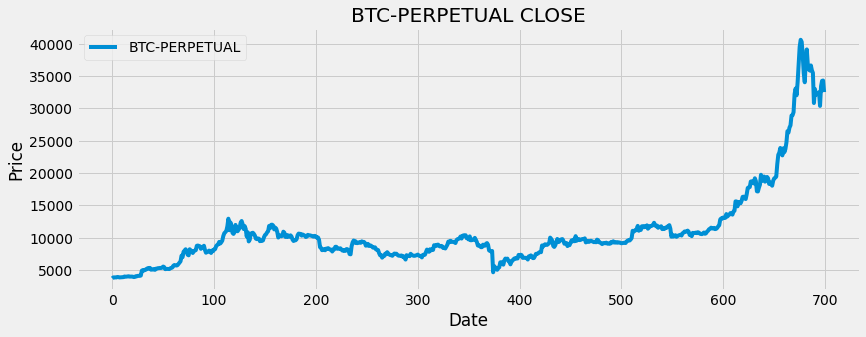

In [30]:
# Visual Data
plt.figure(figsize=(12.5, 4.5))
plt.plot(PriceHist["Close"], label = "BTC-PERPETUAL")
plt.title("BTC-PERPETUAL CLOSE")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc = "upper left")
plt.show()

In [35]:
# Create MA
SMA30 = pd.DataFrame()
SMA30["Close"] = PriceHist["Close"].rolling(window = 30).mean()
SMA45 = pd.DataFrame()
SMA45["Close"] = PriceHist["Close"].rolling(window = 45).mean()

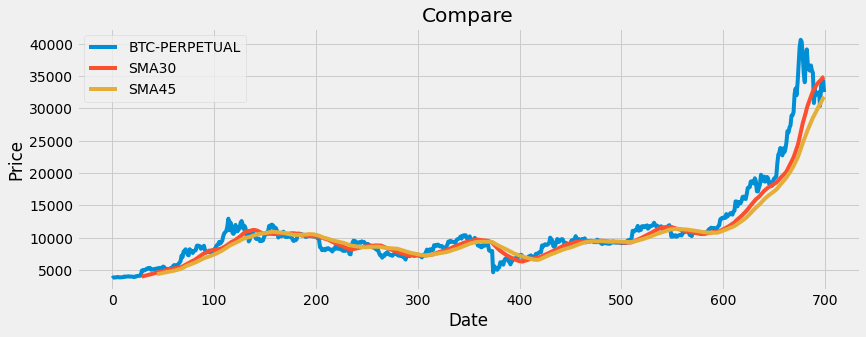

In [39]:
# Visual Data

plt.figure(figsize=(12.5, 4.5))
plt.plot(PriceHist["Close"], label = "BTC-PERPETUAL")
plt.plot(SMA30["Close"], label = "SMA30")
plt.plot(SMA45["Close"], label = "SMA45")
plt.title("Compare")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc = "upper left")
plt.show()

In [50]:
# Create dataframe to store all data
data = pd.DataFrame()
data["BTC"] = PriceHist["Close"]
data["SMA30"] = SMA30["Close"]
data["SMA45"] = SMA45["Close"]
data.head()

,BTC,SMA30,SMA45
0,3701.50,NaN,NaN
1,3847.00,NaN,NaN
2,3852.00,NaN,NaN
3,3856.50,NaN,NaN
4,3842.75,NaN,NaN


In [56]:
# Create Signal
def buy_sell(data):
  sigPrice_Buy = []
  sigPrice_Sell = []
  flag = -1

  for i in range(len(data)):
    if data["SMA30"][i] > data["SMA45"][i]:
      if flag != 1:
        sigPrice_Buy.append(data["BTC"][i])
        sigPrice_Sell.append(np.nan)
        flag = 1
      else :
        sigPrice_Buy.append(np.nan)
        sigPrice_Sell.append(np.nan)
    
    elif data["SMA30"][i] < data["SMA45"][i]:
      if flag != 0:
        sigPrice_Buy.append(np.nan)
        sigPrice_Sell.append(data["BTC"][i])
      else :
        sigPrice_Buy.append(np.nan)
        sigPrice_Sell.append(np.nan)
    
    else :
        sigPrice_Buy.append(np.nan)
        sigPrice_Sell.append(np.nan)

  return (sigPrice_Sell, sigPrice_Sell)

In [57]:
# store buy and sell to variable
buy_sell = buy_sell(data)
data["Buy_Signal_Price"] = buy_sell[0]
data["Sell_Signal_Price"] = buy_sell[1]

In [59]:
data

,BTC,SMA30,SMA45,Buy_Signal_Price,Sell_Signal_Price
0,3701.50,NaN,NaN,NaN,NaN
1,3847.00,NaN,NaN,NaN,NaN
2,3852.00,NaN,NaN,NaN,NaN
3,3856.50,NaN,NaN,NaN,NaN
4,3842.75,NaN,NaN,NaN,NaN
...,...,...,...,...,...
695,30393.50,34265.133333,30655.488889,NaN,NaN
696,33447.00,34467.016667,30970.244444,NaN,NaN
697,34278.50,34646.083333,31299.866667,NaN,NaN
698,34324.50,34825.250000,31587.466667,NaN,NaN
